In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from readrawdata import phpfina_feed

# read emonCMS raw data

* emonCMS [documentation](https://learn.openenergymonitor.org/electricity-monitoring/timeseries/Fixed-interval)


In [3]:
data_path = './phpfina'
print(', '.join(os.listdir(data_path)))

8.meta, 7.meta, 6.dat, 6.meta, 1.dat, 5.meta, 5.dat, 1.meta, 8.dat, 9.dat, 9.meta, 7.dat


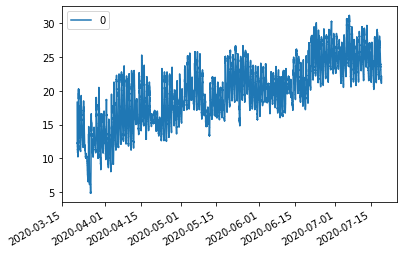

In [4]:
df = phpfina_feed(8)

df.plot()

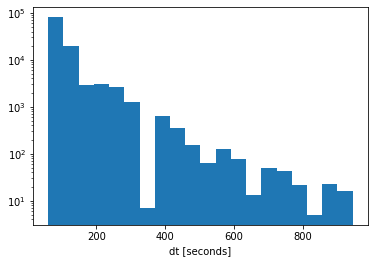

In [5]:
# What are the actual dt ?
unixtime = df.index.to_numpy().astype(int)//1000000000
dt = np.diff(unixtime)
plt.hist(dt[dt<1000], log=True, bins=20)
plt.xlabel('dt [seconds]');

## Graph day by day

In [6]:
def time_in_hours(t):
    total_seconds = t.second + 60*(t.minute + 60*t.hour)
    return total_seconds/(60*60)

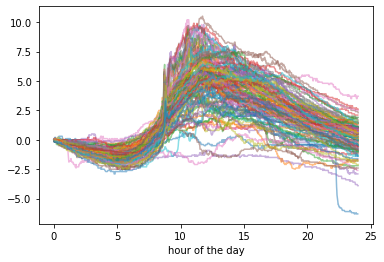

In [7]:
for name, u in df.groupby(by=df.index.date):
    day_time = [time_in_hours(t) for t in u.index.time]
    T = u[0].values
    plt.plot(day_time, T-T[0], alpha=0.5)

plt.xlabel('hour of the day');
#plt.ylim([-3, 3])